### Importing the necessary Packages

In [2]:
import plotly
plotly.__version__

'5.7.0'

In [3]:
# !pip install cufflinks

In [4]:
# !pip install chart_studio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import cufflinks as cf
import chart_studio.plotly as py

import plotly.express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
# pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
var=pd.read_csv('variable_descriptions.csv')
train.head()

In [ ]:

var

In [ ]:
train.info()

In [ ]:
train['source'] = 'train'
test['source'] = 'test'
data =pd.concat([train,test])

In [ ]:
data.shape

## Univariate Analysis

#### Dwelling type
 This is the type of houses in which they live in, House or brick/concrete block structure on a separate stand or yard or on a farm

## Distribution of households

In [ ]:
plt. figure(figsize=(14,7))



sns.distplot(data['total_households'])
plt. rcParams["figure.figsize"] = (14,7)
plt.title('Distribution of South African Households',size= 20)
plt.show()

In [ ]:
sns.distplot(data['total_households'],hist=False)
plt.title('Distribution of South African Households',size= 20)
plt.xlabel('Total Households')
plt.ylabel('Probability density')
plt.show()

In [ ]:
import plotly.express as px

fig = px.imshow(data)
fig.show()

In [ ]:
import plotly.graph_objects as go




fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=data['total_households'], name ='Total Households'))


fig.show('svg')

## Dwelling Places

In [ ]:

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y =data['dw_00'])],
    layout_title_text="Dwelling place type"
)
fig.show()

# g = px.bar(data,y=',color='b')
# dw_00'fi

In [ ]:
dat=data.sample(50)
px.bar(data,x='ward',y='lgt_00', title='Percentange of People with electricity')

In [ ]:
data['dwelling_formal'] = data['dw_00']+data['dw_01']+  data['dw_02']+ data['dw_03'] + data['dw_04']+data['dw_05'] + data['dw_06']  
data['dwelling_informal'] = data['dw_07']+ data['dw_08'] + data['dw_09']+data['dw_10'] 
data['dwelling_unknown']= data['dw_11']+ data['dw_12'] + data['dw_13']


In [ ]:
import plotly.graph_objects as go
from kaleido.scopes.plotly import PlotlyScope
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['dwelling_formal'], name='Formal'))
fig.add_trace(go.Histogram(x=data['dwelling_informal'], name='Informal'))

# Overlay both histograms
fig.update_layout(barmode='overlay',title_text='Histogram of Formal dwelling type against Informal')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)

fig.show()

In [ ]:
#  !pip install -U kaleido

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['dwelling_formal'], name='Formal'))
fig.add_trace(go.Histogram(x=data['dwelling_unknown'], name='Unknown'))

# Overlay both histograms
fig.update_layout(barmode='overlay',title_text='Histogram of Formal dwelling type against Unknown')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['dwelling_informal'], name='InFormal'))
fig.add_trace(go.Histogram(x=data['dwelling_unknown'], name='Unknown'))

# Overlay both histograms
fig.update_layout(barmode='overlay',title_text='Histogram of Informal dwelling type against Unknown')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)


fig.show('svg')

## Language
According to [South-Africa Info](https://southafrica-info.com/arts-culture/11-languages-south-africa/)
South Africa has majorly 11 languages and the population is at least fluent in Two languages, the most popular language is Isozulu, Let's see what our dataset says about this.


In [21]:
data['text'] = data['ward'] + '' + data['ADM4_PCODE'].astype(str)
fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),

            cmin = 0,
            color = data['lan_04'],
            cmax = data['lan_04'].max(),
            colorbar_title="Isizulu Speakers"
             color_discrete_sequence=[ "green", "goldenrod", "magenta"]
        ))
               )
fig.update_layout(
        title = 'Location of South African wards Isizulu speakers',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

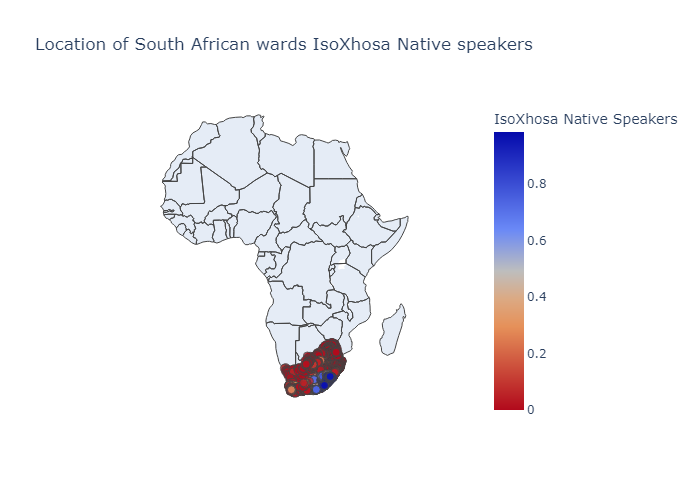

In [22]:
data['text'] = data['ward'] + '' + data['ADM4_PCODE'].astype(str)
fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['lan_03'],
            cmax = data['lan_03'].max(),
            colorbar_title="IsoXhosa Native Speakers"
        ))
               )
fig.update_layout(
        title = 'Location of South African wards IsoXhosa Native speakers',
        geo_scope='africa',
    )
fig.show('png')

In [23]:
fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['lan_00'],
            cmax = data['lan_00'].max(),
            colorbar_title="Afrikaan Native Speakers"
        ))
               )
fig.update_layout(
        title = 'Location of South African wards Afrikaan Native speakers',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

In [24]:
{
    "tags": [
        "hide-input",
    ]
}
fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['lan_01'],
            cmax = data['lan_01'].max(),
            colorbar_title="English Speakers"
        ))
               )
fig.update_layout(
        title = 'Location of South African wards English speakers',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

In [25]:
# lan_05             # sepedi speakers
# lan_06             #sethoso
 
# lan_07             #setswana
# lan_08             # sign language
# lan_09             #  SiSwati
# lan_10             # Tshivenda
# lan_11             #Xitsonga
# lan_12             #Other
# lan_13             # Unspecified 	

In [26]:
{
    "tags": [
        "hide-input",
    ]
}
fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['lan_05'],
            cmax = data['lan_05'].max(),
            colorbar_title="Sepedi Speakers"
        ))
               )
fig.update_layout(
        title = 'Location of South African wards of Sepedi Native speakers',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

In [27]:
{
    "tags": [
        "hide-input",
    ]
}
fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['lan_06']*100,
            cmax = data['lan_06'].max()*100,
            colorbar_title="Sethoso Speakers"
        ))
               )
fig.update_layout(
        title = 'Percentage of South African wards of Sethoso Native speakers',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

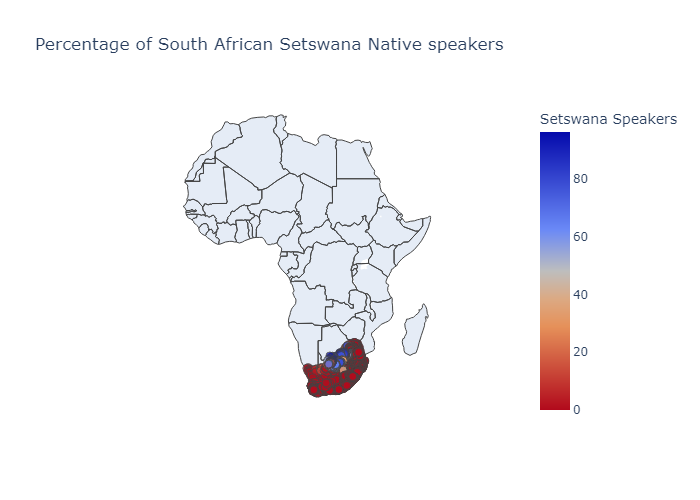

In [28]:
{
    "tags": [
        "hide-input",
    ]
}
fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['lan_07']*100,
            cmax = data['lan_07'].max()*100,
            colorbar_title="Setswana Speakers"
        ))
               )
fig.update_layout(
        title = 'Percentage of South African Setswana Native speakers',
        geo_scope='africa',
    )
fig.show('png')
# fig.show()

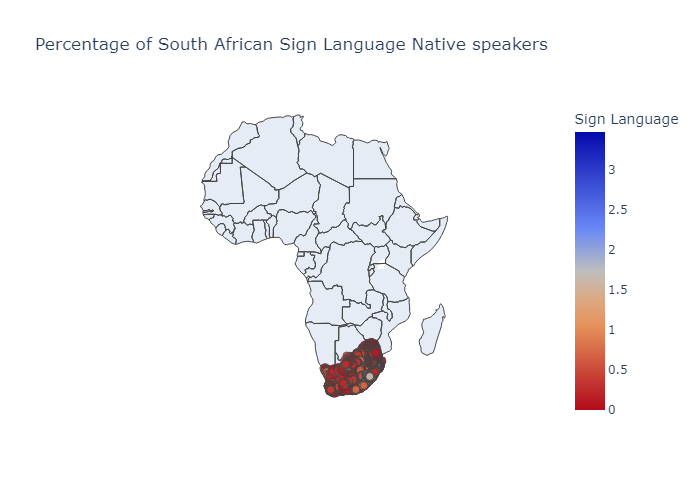

In [29]:

fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['lan_08']*100,
            cmax = data['lan_08'].max()*100,
            colorbar_title="Sign Language"
        ))
               )
fig.update_layout(
        title = 'Percentage of South African Sign Language Native speakers',
        geo_scope='africa',
    )
fig.show('png')
# fig.show()

In [30]:

fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['lan_09']*100,
            cmax = data['lan_09'].max()*100,
            colorbar_title="SiSwati Speakers"
        ))
               )
fig.update_layout(
        title = 'Percentage of South African SiSwati Native speakers',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

In [31]:

fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['lan_10']*100,
            cmax = data['lan_10'].max()*100,
            colorbar_title="Tshivenda Speakers"
        ))
               )
fig.update_layout(
        title = 'Percentage of South African Tshivenda Native speakers',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

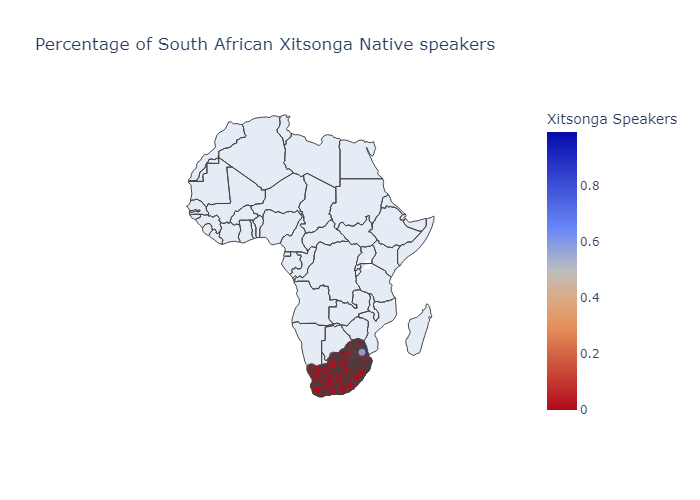

In [32]:

fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['lan_11'],
            cmax = data['lan_11'].max(),
            colorbar_title="Xitsonga Speakers"
        ))
               )
fig.update_layout(
        title = 'Percentage of South African Xitsonga Native speakers',
        geo_scope='africa',
    )
fig.show('png')
# fig.show()

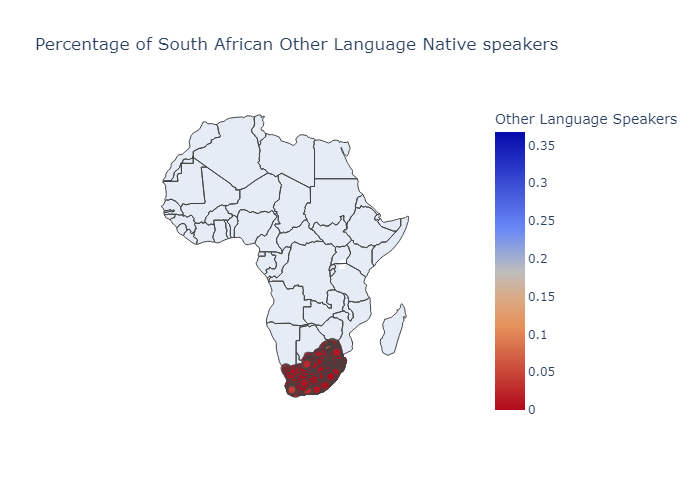

In [33]:

fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['lan_12'],
            cmax = data['lan_12'].max(),
            colorbar_title="Other Language Speakers"
        ))
               )
fig.update_layout(
        title = 'Percentage of South African Other Language Native speakers',
        geo_scope='africa',
    )
fig.show('png')
# fig.show()

In [34]:
#  pg_00              2822 non-null   float64
#  45  pg_01              2822 non-null   float64
#  46  pg_02              2822 non-null   float64
#  47  pg_03              2822 non-null   float64
#  48  pg_04              2822 non-null   float64

## Ethnic Groups

In [35]:

fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['pg_00'],
            cmax = data['pg_00'].max(),
            colorbar_title="Black Africans"
        ))
               )
fig.update_layout(
        title = 'Distribution of South African Black Africans',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

In [36]:
# 40 	pg_00 	Percentage in population group: Black African
# 41 	pg_01 	Percentage in population group: Coloured 
# 42 	pg_02 	Percentage in population group: Indian or Asian
# 43 	pg_03 	Percentage in population group: White 
# pg_04 	Percentage in population group: Other 

In [37]:

fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['pg_01'],
            cmax = data['pg_01'].max(),
            colorbar_title="Colored"
        ))
               )
fig.update_layout(
        title = 'Distribution of  Colored South African',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

In [38]:

fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['pg_02'],
            cmax = data['pg_02'].max(),
            colorbar_title="Indian or Asian "
        ))
               )
fig.update_layout(
        title = 'Distribution of  Indian or Asian South African',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

In [39]:

fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['pg_03'],
            cmax = data['pg_03'].max(),
            colorbar_title="White Africans"
        ))
               )
fig.update_layout(
        title = 'Distribution of  White South African',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

In [40]:

fig = go.Figure(data=go.Scattergeo(
        lon = data['lon'],
        lat = data['lat'],
        text = data['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            
            line = dict(
                width=1,
            
            ),

            cmin = 0,
            color = data['pg_04'],
            cmax = data['pg_04'].max(),
            colorbar_title="Other races"
        ))
               )
fig.update_layout(
        title = 'Distribution of  Other  South African races',
        geo_scope='africa',
    )
# fig.show('png')
fig.show()

In [41]:
data.describe()

total_households  total_individuals       target        dw_00  \
count       3835.000000        3835.000000  2822.000000  3835.000000   
mean        3523.034239       12552.886065    24.507554     0.665409   
std         3150.715522        9569.423219    10.294387     0.246614   
min            1.000000         359.881550     0.000000     0.000000   
25%         1735.446115        6911.898170    16.751556     0.520389   
50%         2281.103690        9022.354340    24.156670     0.732733   
75%         3774.160880       13602.342065    32.226553     0.862848   
max        39684.942130       91716.746370    55.528423     0.994962   

             dw_01        dw_02        dw_03        dw_04        dw_05  \
count  3835.000000  3835.000000  3835.000000  3835.000000  3835.000000   
mean      0.133501     0.036257     0.005542     0.007795     0.011874   
std       0.238090     0.080782     0.017389     0.027560     0.042511   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.002970     0.002847     0.000000     0.000000     0.000000   
50%       0.011090     0.008556     0.000859     0.000653     0.001051   
75%       0.118624     0.035710     0.002610     0.002359     0.004420   
max       0.985465     0.951806     0.264239     0.392085     0.742617   

             dw_06  ...        pw_05        pw_06   pw_07   pw_08  \
count  3835.000000  ...  3835.000000  3835.000000  3835.0  3835.0   
mean      0.023818  ...     0.010942     0.134153     0.0     0.0   
std       0.038561  ...     0.023029     0.228252     0.0     0.0   
min       0.000000  ...     0.000000     0.000000     0.0     0.0   
25%       0.003340  ...     0.000141     0.005049     0.0     0.0   
50%       0.009716  ...     0.001392     0.023655     0.0     0.0   
75%       0.026695  ...     0.009898     0.136971     0.0     0.0   
max       0.418048  ...     0.228261     0.993841     0.0     0.0   

               lat          lon           NL  dwelling_formal  \
count  3835.000000  3835.000000  3835.000000      3835.000000   
mean    -28.415347    27.635497    16.438122         0.884196   
std       3.155866     3.434569    18.951210         0.147194   
min     -34.670197    16.760022     0.000000         0.000000   
25%     -30.858571    26.619325     2.001946         0.847450   
50%     -27.969031    28.318736     7.815497         0.944133   
75%     -25.964556    30.081648    25.410298         0.980804   
max     -22.331267    32.858249    63.000000         1.000000   

       dwelling_informal  dwelling_unknown  
count        3835.000000       3835.000000  
mean            0.107661          0.008143  
std             0.144770          0.022556  
min             0.000000          0.000000  
25%             0.013383          0.002110  
50%             0.046934          0.004222  
75%             0.142752          0.008235  
max             0.982041          1.000000  

[8 rows x 64 columns]

In [42]:
df = data.copy()

In [43]:
df.drop(['ward','ADM4_PCODE','source','text'],inplace=True,axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3835 entries, 0 to 1012
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_households   3835 non-null   float64
 1   total_individuals  3835 non-null   float64
 2   target             2822 non-null   float64
 3   dw_00              3835 non-null   float64
 4   dw_01              3835 non-null   float64
 5   dw_02              3835 non-null   float64
 6   dw_03              3835 non-null   float64
 7   dw_04              3835 non-null   float64
 8   dw_05              3835 non-null   float64
 9   dw_06              3835 non-null   float64
 10  dw_07              3835 non-null   float64
 11  dw_08              3835 non-null   float64
 12  dw_09              3835 non-null   float64
 13  dw_10              3835 non-null   float64
 14  dw_11              3835 non-null   float64
 15  dw_12              3835 non-null   float64
 16  dw_13              3835 

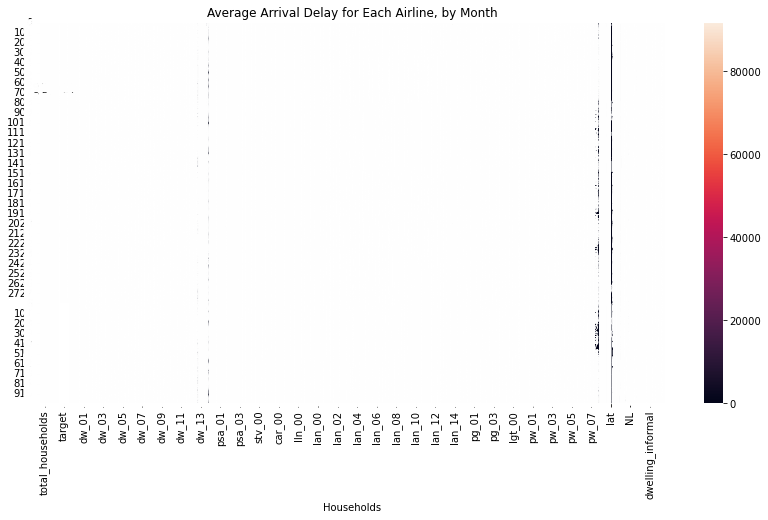

In [45]:
import seaborn as sns
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=df,annot=True )

# Add label for horizontal axis
plt.xlabel("Households")
plt.show()